# How to handle Categorical Missing Values (Categorical imputation)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
[i for i in os.listdir() if i.endswith('.csv')]

<IPython.core.display.Javascript object>

['weight-height.csv',
 'Advertising.csv',
 'Salary_Data.csv',
 'HW.csv',
 'canada.csv',
 'bmw_pricing_challenge.csv',
 'bhp.csv',
 'titanic.csv',
 'wine.csv',
 'ahpp.csv',
 'hiring.csv',
 'test_scores.csv',
 'All Passwords.csv',
 '50_Startups.csv',
 'car_dataset.csv',
 'titanic_train.csv']

## Frequent Category Imputation

In [8]:
df=pd.read_csv('ahpp.csv')
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [12]:
ndf=pd.read_csv('ahpp.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
ndf.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [15]:
ndf.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

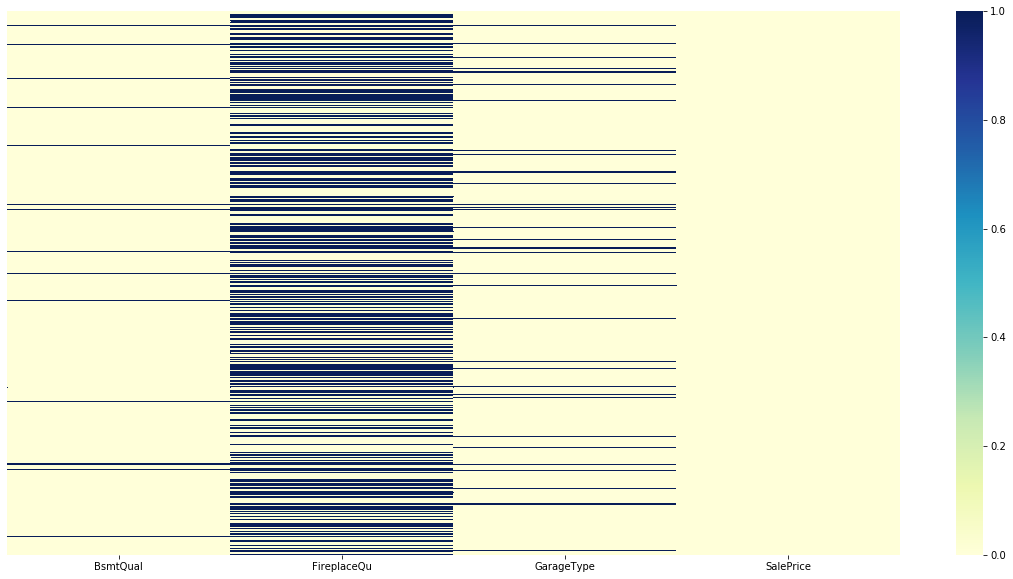

In [28]:
fig=plt.figure(figsize=[20,10])
sns.heatmap(ndf.isnull(), yticklabels=False, cmap='YlGnBu')

### Now let's try to evaluate the most frequently occuring value inside each feature

In [54]:
def most_frequent(ds,ftr):
    print(ds[ftr].value_counts().sort_values(ascending=True).plot.bar());

AxesSubplot(0.125,0.125;0.775x0.755)


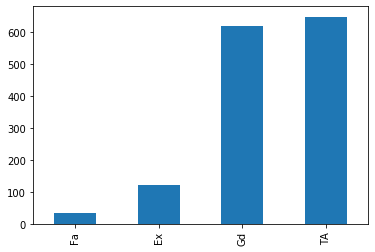

In [55]:
most_frequent(ndf,'BsmtQual'); #Most Frequently occuring is TA

AxesSubplot(0.125,0.125;0.775x0.755)


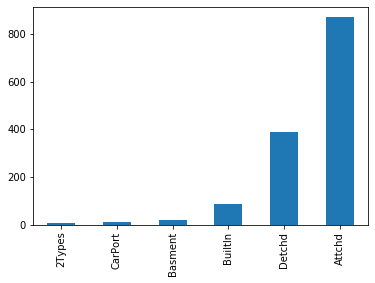

In [56]:
most_frequent(ndf,'GarageType');# Most frequently occuring is Attchd

AxesSubplot(0.125,0.125;0.775x0.755)


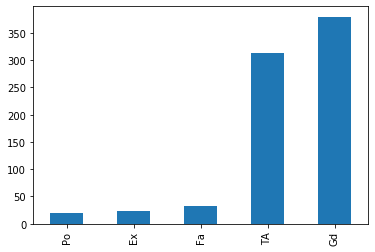

In [132]:
most_frequent(ndf,'FireplaceQu');

In [147]:
bq=ndf.BsmtQual.value_counts().index[0]

In [148]:
fq=ndf.FireplaceQu.value_counts().index[0]

In [149]:
gt=ndf.GarageType.value_counts().index[0]

In [150]:
bq,fq,gt

('TA', 'Gd', 'Attchd')

In [151]:
def replace(ds,ftr,fc):
    ds[ftr].fillna(fc, inplace=True)

In [153]:
replace(ndf,'BsmtQual',bq)

In [157]:
replace(ndf,'GarageType',gt)
replace(ndf,'FireplaceQu',fq)

In [158]:
ndf.isna().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

In [159]:
ndf

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,Gd,Attchd,142125


# Adding a Variable to Capture NaN in Categorical Imputation

In [160]:
sdf=pd.read_csv('ahpp.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
sdf.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [161]:
sdf.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [163]:
sdf.BsmtQual.mode()[0]

'TA'

In [164]:
def replace(ds,ftr):
    ds[ftr+'_new']=np.where(ds[ftr].isna(),1,0)
    most_frequent=ds[ftr].mode()[0]
    ds[ftr].fillna(most_frequent, inplace=True)

    


In [165]:
for feat in ['BsmtQual','FireplaceQu','GarageType']:
    replace(sdf,feat)

In [166]:
sdf

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_new,FireplaceQu_new,GarageType_new
0,Gd,Gd,Attchd,208500,0,1,0
1,Gd,TA,Attchd,181500,0,0,0
2,Gd,TA,Attchd,223500,0,0,0
3,TA,Gd,Detchd,140000,0,0,0
4,Gd,TA,Attchd,250000,0,0,0
...,...,...,...,...,...,...,...
1455,Gd,TA,Attchd,175000,0,0,0
1456,Gd,TA,Attchd,210000,0,0,0
1457,TA,Gd,Attchd,266500,0,0,0
1458,TA,Gd,Attchd,142125,0,1,0
